# Studying water in porous media using neutron imaging

## Tutorial objectives

- Learning how to work with images in python.
- Understanding how the water content can be quantified from images.
    - Normalization
    - Correcting for scattering
    - Estimating the attenation coefficient of water (video demonstration).
- Planning a real time imaging experiment.
    - Finding pixel size and exposure time.
- Detecting the position of a water front in a time series.
    - Performing a capillary rise experiment (video demonstrations).
    - Reduction

### Loading some needed modules

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tifffile as tiff

## Working with images

### Load and inspect images

### Image arithmetics

### Image filters

## Determining the attenuation coefficient of water
Neutrons are very sensitive to hydrogen. This fact is often used in neutron imaging to measure the local water content in a sample. The thickness of water behind each pixel can be determined using Beer-Lambert's law

$$I_{wet}=I_0 e^{-\int_L \mu(x)dx}$$

which simplifies to 

$$I=I_0 e^{-\left(l_{H_2O}\cdot\mu_{H_2O}+l_{sand}\cdot\mu_{sand}+l_{container}\cdot\mu_{container}\right)}$$

<img src="figures/porous_media_sand.svg" style="height:200px" />

The terms for _sand_ and _container_ can be removed with help of reference images, which leaves us with the term for water $l_{H_2O}\cdot\mu_{H_2O}$. Here, $l_{H_2O}$ is the thinkness of water which is the information we want to know and $\mu_{H_2O}$ is the attenuation coefficient of water. Now, this measurement provides more information than we actually need. Therefore, we need a reference meassurement if the container with dry sand. 

$$I_{dry}=I_0 e^{-\left(l_{sand}\cdot\mu_{sand}+l_{container}\cdot\mu_{container}\right)}$$

Dividing $I_{wet}$ by $I_{dry}$ like

$$T_{H_2O}=\frac{I_{wet}}{I_{dry}}=e^{-l_{H_2O}\cdot\mu_{H_2O}}$$

Gives us the transmission contribution of water. This result still doesn't tell us the water thickness. For that, we need to know the attenuation coefficient of water $\mu_{H_2O}$ which we will estimate in the first exercise.

### Using a step wedge
A step wedge is a wedge shaped device with step wise increasing material thickness. This allows to determine the attenuation coefficient for different thicknesses and thereby increasing the accuracy of the estimate compared to measuring for a single thickness.  

<img src="figures/step_wedge.svg" style="height:300px"/>

A step wedge for liquids is a container in which you pour the liquid. It is best to use a container with constant wall thickness to reduce the uncertainty of changing amounts of material besides the liqiud itself. The wedges used in this experiment have the steps
0.5, 1.0, 1.5, 2.0, 2.5 mm for the thinner wedge and 3.0, 3.5, 4.0, 4.5, 5.0 mm for the thicker wedge.

For this task you'll need a collection of images.
1. Reference images, open beam and dark current.
2. One image of the empty container.
3. One image of the filled container.

It is important that the contatiner is not displaced between 2. and 3., otherwise there will be normalization errors. The data is located in the folder ```../data/stepwedge``` where the filenames indicate the file contents and also which exposure time was used.

### Computing the attenuation coefficient - part 1
In this exercise you will load an image with a stepwedge and reference images for open beam and dark current. These images will be used to calculate $\mu$ for different thicknesses. Please note here that the step wedge container material is also included in the image. This means that you will include the contribution of $l_{container}\cdot\mu_{container}$ in your measurement. How can you compensate for this term?

In [ ]:
# Load and inspect the images (your code)

dc    = 
ob    = 
empty = 
h2o   = 

Ideally, you should be able to calculate
$$p=\int_L \mu(x)dx= -log\left(\frac{I}{I_0}\right)$$
Technically, there are two details to handle when you want to normalize your images
1. The detector adds a bias to the images due to the dark current noise.
2. The neutron source is not operating with constant flux

<img src="figures/hipa-info.png" style="height:200px"/>

Therefore, we have to modify the equation to 
$$p=\int_L \mu(x)dx= -log\left(\frac{I-I_{DC}}{I_0-I_{DC}}\cdot \frac{D(I_0-I_{DC})}{D(I-I_{DC})}\right)$$
where $I_0$ is a dark current image and $D(\cdot)$ is a dose operator. The dose is often measured as the average gray level in a region on the side of the measured object. To do this you have to identify the coordinates of the region you like to use and use array slicing and the average operation, e.g. ```img[100:150, 200:250].mean()``` will compute the average value in the region of rows 100 to 150 and columns 200 to 250. The logarithm function is provided by numpy as ```np.log()```.

In [ ]:
# Normalize (your code)


You can also compare the effect of including the dose term. Note that $p$ should be zero in air.

#### Obtain the step values from the images
The goal of the exercise is to obtain a gray value from each thickness in the wedges. This is again done using array slicing and averaging like for the dose value. This time, we will however only compute the average in one direction at first using ```img[100:150, 200:250].mean(axis=1)```. Here, ```axis=1``` tells that the average is computed in the horizontal direction only. Find the region you want to measure and plot the resulting average profile. You can also compute the standard deviation using the array method ```.std(axis=1)``` if you like. Fitting the data points to estimate the is easiest done using ```m,b=np.polyfit(x,y,1)```.

In [ ]:
# Your code here


### The impact of scattering
The attenuation law assumes the radiation to be absorbed by the medium the are entering. This is however not true for neutrons. They are dominantly scattered in the material with the consequence that they will produce a bias in the images. This bias can result in measurement errors up to 50%. In the figure below, you can see how the ratio between scattering and absorption in by different commonly used elements.

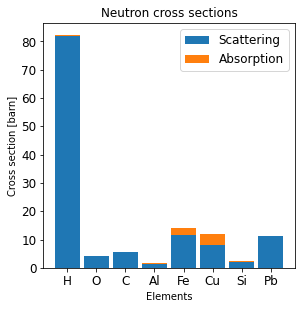

In [69]:
elements = 'H','O','C','Al','Fe','Cu','Si','Pb'
idx = np.arange(len(elements))
xs = np.array([[1.7568, 80.26,  82.02,  0.3326 ],
      [4.232,  0.0008, 4.232,  0.00019],
      [5.551,  0.001,  5.551,  0.0035],
      [1.495,  0.0082, 1.503,  0.231 ],
      [11.22,  0.4,    11.62,  2.56 ],
      [7.485,  0.55,   8.03,   3.78 ],
      [2.163,  0.004,  2.1670, 0.171],
      [11.115, 0.003,  11.118, 0.171 ]])

width= 0.85
fontsize=12
plt.figure(figsize=[4.5,4.5])
plt.bar(idx,xs[:,2],width,label='Scattering')
plt.bar(idx,xs[:,3],width,label='Absorption',bottom=xs[:,2])
plt.xticks(idx,elements,fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xlabel('Elements')
plt.ylabel('Cross section [barn]')
plt.title('Neutron cross sections');

### Computing the attenuation coefficient - part 2


<img src="figures/scattering.jpeg" style="height:300px" />

Scattering correction requires a revised form of the normalization equation we previously used. This equation now includes estimated of the scattered neutrons. These esitmates are computed from two additional reference images where a grid with black body dots is inserted in open beam and sample images. 
 
$$\frac{\tilde{I}_n}{\tilde{I}_{OB}}=\frac{I_n}{I_{OB}}\cdot\frac{D(I_{OB})}{D(I_{n})}=\frac{I_{n}^{*}-I_{DC}-I_{n,BB}^{S}\frac{D\left(I_{n}^{*}-I_{DC}\right)}{D\left(I_{n,BB}^{*}-I_{DC}-\left(1-\frac{1}{\tau_{BB}}\right)I_{n,BB}^{S}\right)\tau_{BB}}}{I_{OB}^{*}-I_{DC}-I_{BG,BB}^{S}\frac{D\left(I_{OB}^{*}-I_{DC}\right)}{D\left(I_{OB,BB}^{*}-I_{DC}-\left(1-\frac{1}{\tau_{BB}}\right)I_{BG,BB}^{S}\right)\tau_{BB}}}\cdot\frac{D\left(I_{OB}^{*}-I_{DC}-I_{BG,BB}^{S}\frac{D\left(I_{OB}^{*}-I_{DC}\right)}{D\left(I_{OB,BB}^{*}-I_{DC}-\left(1-\frac{1}{\tau_{BB}}\right)I_{BG,BB}^{S}\right)\tau_{BB}}\right)}{D\left(I_{n}^{*}-I_{DC}-I_{n,BB}^{S}\frac{D\left(I_{n}^{*}-I_{DC}\right)}{D\left(I_{n,BB}^{*}-I_{DC}-\left(1-\frac{1}{\tau_{BB}}\right)I_{n,BB}^{S}\right)\tau_{BB}}\right)}$$

The revised equation is, as you can see, quite complicated and __we will use a pre-implemented function__ in this exercise.

In this exercise we'll need some additional reference images. Namely those needed to estimate the bias introduced by scattering. These images are also located in the folder with the step wedge images.

- ```exp##s_bbempty.tif```
- ```exp##s_bbh2o.tif```

In [70]:
# Load and show BB images (your code). 

bbob  = 
bbs   = 



## Planning a real-time experiment

### Noise in images

### Relation between noise and pixel size/exposure time

## Estimating the pore size using capillary rise and Washborn's equation
From [Wikipedia](https://en.wikipedia.org/wiki/Washburn%27s_equation):
>In physics, Washburn's equation describes capillary flow in a bundle of parallel cylindrical tubes; it is extended with some issues also to imbibition into porous materials. 
A liquid having a dynamic viscosity $\eta$ and surface tension 
$\gamma$ will penetrate a distance $L$ into the capillary whose pore radius is $r$ following the relationship:
>$$L={\sqrt {\frac {\gamma rt\cos(\phi )}{2\eta }}}$$
>Where $\phi$  is the contact angle between the penetrating liquid and the solid (tube wall).

<img src="figures/rising-damp.jpg" style="height:300px" />

In this experiment, we will observe a water front rising in a sand packing using a time-series of neutron radiographs. 

### Sample preparation

#### Sample dimensions

### Image acquisition

### Data reduction

### Extracting the front profile

### Fitting data to Washborn's equation

Here is a [tutorial](https://nbviewer.org/github/neutronimaging/coding-recipes/blob/main/python/CurveFitting.ipynb) how to fit a function to a data set.

The first step is to define a fitting function and provide the needed constants

In [ ]:
# Your code


Now you are ready to fit your data

In [ ]:
# Your code


Plot the fitted data and check how well it fits the measured curve.

In [ ]:
# Your code


## Summary

In this tutorial, we learned how quantify information from neutron images.

1. We measured the attenuation coefficient of water and saw the impact of scattered neutrons. The attenuation coefficient is used to measure the amount of water in a sample based on varaiations in gray levels. It is therefore important to know this constant very precisely.

2. In the second experiment we tracked the position of the water front in a sample to measure the average pore radius in a sand packing.

In addition to learning more about these main objectives, we also learned how to use different python packages to solve the analysis tasks in a repeatable way and also how to present the results in plots and image displays.